In [1]:
import astropy.coordinates as coords
import astropy.constants as const
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

def do_plot(sun_mult=1,planet_mult=1,SMA_mult=1) :
    #Sun-Jupiter in circular orbit
    M1 = const.M_sun*sun_mult
    M2 = 10*const.M_jup*planet_mult
    R = (5.20336301*const.au).to('au')*SMA_mult # https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html

    ### M1-M2 position
    R1 = -R*M2/(M1+M2)
    R2 = +R*M1/(M1+M2)

    # Make 2D grid points
    ax_r = np.linspace(0.7*R,1.3*R,100)
    ax_th = np.linspace(0,2*np.pi,2000)
    gridr,gridth = np.meshgrid(ax_r,ax_th)
    gridx = gridr*np.cos(gridth)
    gridy = gridr*np.sin(gridth)
    rgrid = np.sqrt(gridx**2+gridy**2).to('m')
    rgrid1 = np.sqrt((gridx-R1)**2+gridy**2).to('m')
    rgrid2 = np.sqrt((gridx-R2)**2+gridy**2).to('m')

    # Generate potentials on 2D grid
    phi_G1 = -const.G*M1/rgrid1
    phi_G2= -const.G*M2/rgrid2

    ## Angular velocity of inflated earth at 1AU
    Omega = ((const.G*(M1+M2)/R**3)**0.5)
    phi_centripetal = -0.5*(Omega*rgrid)**2

    phi_tot = (phi_G1+phi_G2+phi_centripetal).value

    from mpl_toolkits.mplot3d import Axes3D
    fig=plt.figure(figsize=(20,10))

    ax=fig.add_subplot(121)
    ax.pcolormesh(gridx.value,
               gridy.value,
               phi_tot,
               vmin= np.nanpercentile(phi_tot.flatten(),10),
               vmax = np.nanpercentile(phi_tot.flatten(),100),
               cmap="coolwarm"
               )
    ax.contour(gridx.value,
               gridy.value,
               phi_tot,
               [np.nanpercentile(phi_tot,x_) for x_ in [10,20,30,40,50,60,70,80,90,99]],
               cmap="Greys"
               )
    ax.set_aspect(1)

    ax=fig.add_subplot(122,projection='3d')
    ax.plot_surface(gridx.value,
                    gridy.value,
                    phi_tot,
                    vmin= np.nanpercentile(phi_tot.flatten(),30),
                    vmax = np.nanpercentile(phi_tot.flatten(),99),
                    cmap="coolwarm",alpha=0.8)

    ax.contour3D(gridx.value,
                    gridy.value,
                    phi_tot,
                    [np.nanpercentile(phi_tot,x_) for x_ in [10,20,30,40,50,60,70,80,90,99]],
                    cmap="Greys")

    ax.set_zlim(-0.5e9,0)

    ax.view_init(30,-45)
    ax.set_xlim(-6.,6)
    ax.set_ylim(-6,6)


In [4]:
for planet_mult in np.arange(0.1,10,0.1) :
    do_plot(planet_mult=planet_mult)
    plt.savefig(f"./plots/{planet_mult:.1f}.jpg")
    plt.close()

<ipython-input-1-5491596c77ba>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(gridx.value,


(-300000000.0, 100000000.0)

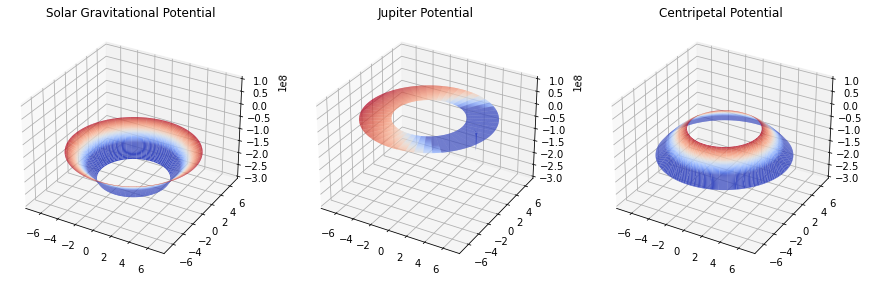

In [44]:
#Sun-Jupiter in circular orbit
M1 = const.M_sun
M2 = const.M_jup
R = (5.20336301*const.au).to('au') # https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html

### M1-M2 position
R1 = -R*M2/(M1+M2)
R2 = +R*M1/(M1+M2)

# Make 2D grid points
ax_r = np.linspace(0.7*R,1.3*R,100)
ax_th = np.linspace(0,2*np.pi,2000)
gridr,gridth = np.meshgrid(ax_r,ax_th)
gridx = gridr*np.cos(gridth)
gridy = gridr*np.sin(gridth)
rgrid = np.sqrt(gridx**2+gridy**2).to('m')
rgrid1 = np.sqrt((gridx-R1)**2+gridy**2).to('m')
rgrid2 = np.sqrt((gridx-R2)**2+gridy**2).to('m')

# Generate potentials on 2D grid
phi_G1 = (-const.G*M1/rgrid1).to("J/kg")
phi_G2= (-const.G*M2/rgrid2).to("J/kg")

## Angular velocity of inflated earth at 1AU
Omega = ((const.G*(M1+M2)/R**3)**0.5)
phi_centripetal = (-0.5*(Omega*rgrid)**2).to('J/kg')

phi_tot = (phi_G1+phi_G2+phi_centripetal).value

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15,5))

ax=fig.add_subplot(131,projection='3d')
ax.plot_surface(gridx.value,
           gridy.value,
           phi_G1,
           vmin= np.nanpercentile(phi_G1.value.flatten(),30),
           vmax = np.nanpercentile(phi_G1.value.flatten(),100),
           #phi_1au.value*np.linspace(0.5,2.0,30),
           cmap="coolwarm"
           )
ax.set_zlim(-3e8,1e8)
ax.set_title("Solar Gravitational Potential")


phi_G2[phi_G2.value < -3e8] = np.nan
ax=fig.add_subplot(132,projection='3d')
ax.plot_surface(gridx.value,
           gridy.value,
           phi_G2,
           vmin= np.nanpercentile(phi_G2.value.flatten(),30),
           vmax = np.nanpercentile(phi_G2.value.flatten(),100),
           #phi_1au.value*np.linspace(0.5,2.0,30),
           cmap="coolwarm"
           )
ax.set_zlim(-3e8,1e8)
ax.set_title("Jupiter Potential")


ax=fig.add_subplot(133,projection='3d')
ax.plot_surface(gridx.value,
           gridy.value,
           phi_centripetal,
           vmin= np.nanpercentile(phi_centripetal.value.flatten(),30),
           vmax = np.nanpercentile(phi_centripetal.value.flatten(),100),
           #phi_1au.value*np.linspace(0.5,2.0,30),
           cmap="coolwarm"
           )
ax.set_title("Centripetal Potential")
ax.set_zlim(-3e8,1e8)

Text(0.5, 0.92, 'Total Potential Solar-Jovian System')

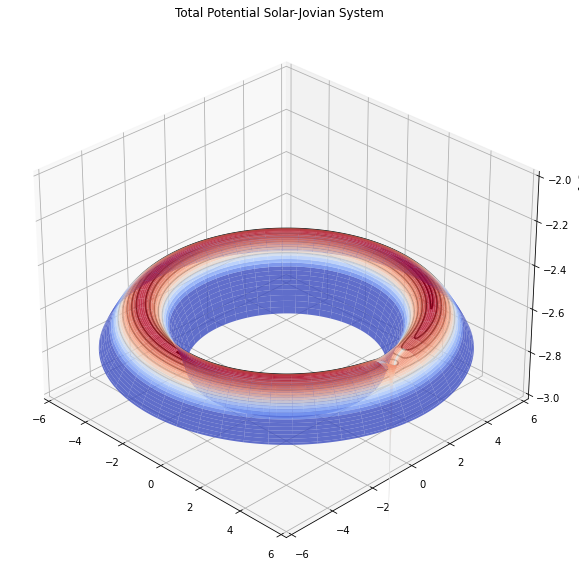

In [48]:
# from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection='3d')
ax.plot_surface(gridx.value,
                gridy.value,
                phi_tot,
                vmin= np.nanpercentile(phi_tot.flatten(),30),
                vmax = np.nanpercentile(phi_tot.flatten(),99),
                cmap="coolwarm",alpha=0.8)

ax.contour3D(gridx.value,
                gridy.value,
                phi_tot,
                [np.nanpercentile(phi_tot,x_) for x_ in [30,40,50,60,70,80,90,99]],
                cmap="Greys")

ax.set_zlim(-3e8,-2e8)

ax.view_init(30,-45)
ax.set_xlim(-6.,6)
ax.set_ylim(-6,6)
ax.set_title("Total Potential Solar-Jovian System")
# ax.set_ylim(-0.8,0.8)